## Please, fill in before you start:

First Name: Majid

Last Name: Sohrabi

Group: ISSA (Data Science)

# Task 1 (3 points)

Generate a toy dataset for the "XOR" problem:

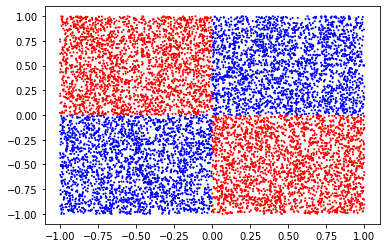

i.e. where the two features are distributed **uniformly** in $[-1, 1]$, and the target is $y = (x_0 >= 0) \text{ XOR } (x_1 >= 0)$.

Let the total number of points in the dataset be $N=10000$.

Fit a `sklearn.tree.DecisionTreeClassifier` on this data. Find a minimal `max_depth` value that results in train accuracy $>0.99$.

For each value of `max_depth` from 1 to the value found above, plot the data with the decision boundary for the obtained model. (*Hint: use `s=1` argument to `plt.scatter` to be able to see anything behind the data points.*)

For the model with train accuracy $>0.99$ use `sklearn.tree.plot_tree` to observe the tree structure.

### Imports

In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree, DecisionTreeClassifier
from sklearn.metrics import roc_curve, roc_auc_score

 ### Generating Data

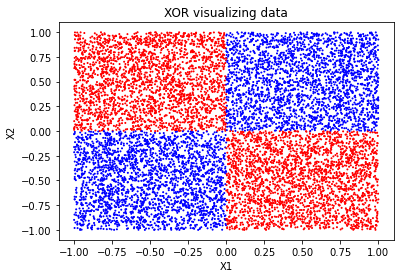

In [138]:
np.random.seed(12)
points_NO = 10000

data = np.random.uniform(-1, 1, size=(points_NO, 2))

target = []
for iter in range(0, points_NO):
  if (((data[iter, 0] >= 0) and (data[iter, 1] >= 0)) or ((data[iter, 0] < 0) and (data[iter, 1] < 0))):
    target.append(0)
  else:
    target.append(1)

# Visualize the dataset
colormap = np.array(['b', 'r'])
plt.scatter(data[:, 0], data[:, 1], s=1, c = colormap[target])
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('XOR visualizing data')

plt.show()

### Decision Tree

In [139]:
# Minimum max_depth finder
for depth in range(1, 20):
  CART = DecisionTreeClassifier(max_depth = depth).fit(data, target)
  y_pred = CART.predict(data)
  accuracy = accuracy_score(target, y_pred)
  
  print(f'For max_depth = {depth} $$ We have accuracy = {accuracy}')

  if accuracy > 0.99:
    min_max_depth = depth
    break

print(f'\nThe minimum max_depth with (accuracy > 0.99) is {min_max_depth}')

For max_depth = 1 $$ We have accuracy = 0.5011
For max_depth = 2 $$ We have accuracy = 0.5023
For max_depth = 3 $$ We have accuracy = 0.5039
For max_depth = 4 $$ We have accuracy = 0.5143
For max_depth = 5 $$ We have accuracy = 0.5291
For max_depth = 6 $$ We have accuracy = 0.5412
For max_depth = 7 $$ We have accuracy = 0.8516
For max_depth = 8 $$ We have accuracy = 1.0

The minimum max_depth with (accuracy > 0.99) is 8


### Visualizing results

In [140]:
def decision_boundary(input_pred):

# Set min and max values and give it some padding
  min1, max1 = data[:, 0].min()-1, data[:, 0].max()+1
  min2, max2 = data[:, 1].min()-1, data[:, 1].max()+1

  # define the x and y scale
  x1grid = np.arange(min1, max1, 0.1)
  x2grid = np.arange(min2, max2, 0.1)

  # Generate a grid of points with distance h between them
  xx, yy = np.meshgrid(x1grid, x2grid)

  # Predict the function value for the whole gid
  Z = input_pred(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)

  # Plot the contour and training examples
  plt.contourf(xx, yy, Z, cmap='RdBu')
  plt.colorbar(plt.contourf(xx, yy, Z, cmap='RdBu'))
  plt.scatter(data[:, 0], data[:, 1], c = target, cmap = 'RdBu')

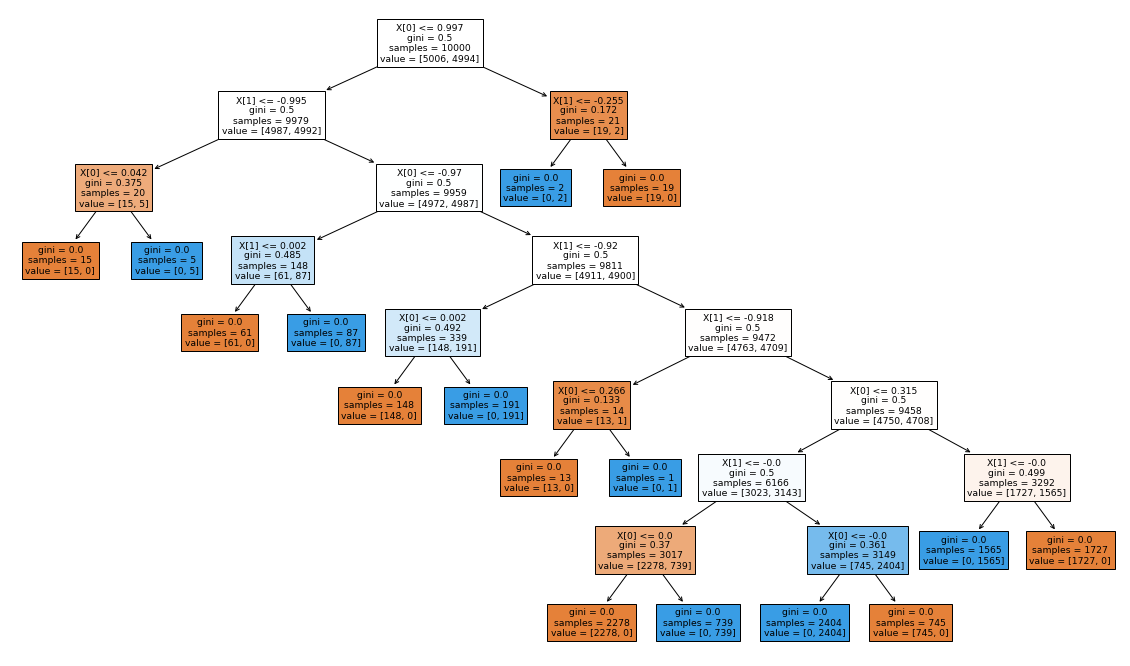

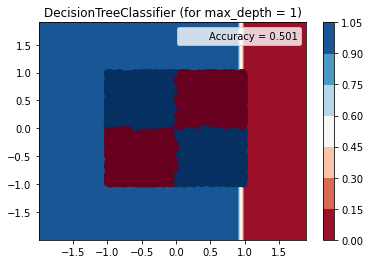

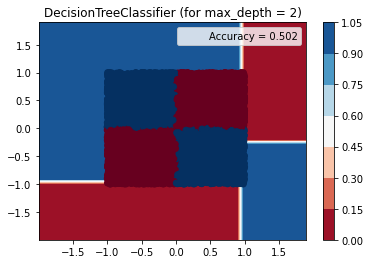

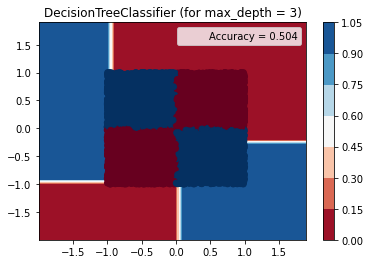

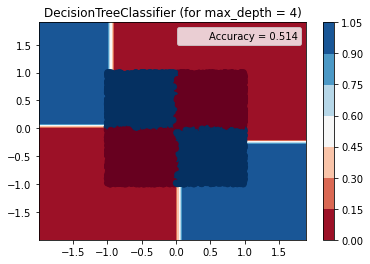

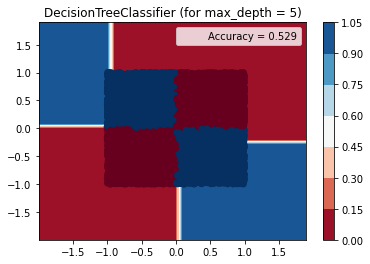

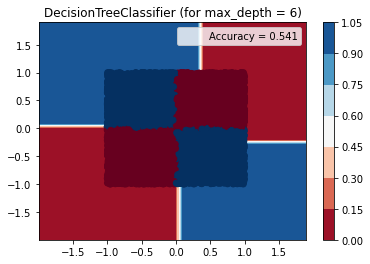

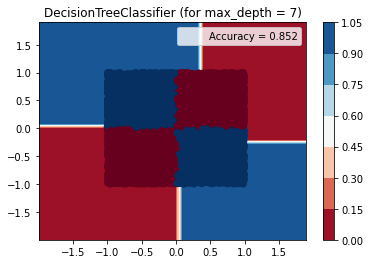

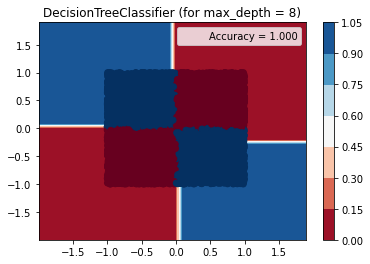

In [141]:
# Visualize the diagram for CART
plt.figure(figsize=(20, 12))
plot_tree(CART, filled=True)
plt.show()

print('\n\n')

# Visualizing decision boundaries
for iter in range(1, min_max_depth + 1):

  CART =DecisionTreeClassifier(max_depth= iter).fit(data, target)
  decision_boundary(lambda data: CART.predict(data))
  y_pred = CART.predict(data)

  plt.title(f'DecisionTreeClassifier (for max_depth = {iter})')
  plt.plot([], [], ' ',
             label='Accuracy = {:.3f}'.format(accuracy_score(target, y_pred)))
    
  plt.legend()
  plt.show()
  print('')

# Task 2 (3 points)

Consider the following dataset:

In [147]:
import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
print(data.DESCR)

X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target_names[data.target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12345)

print(X_train.iloc[:5])
print(y_train[:5])
print(y_test[:5])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

Build a `sklearn.tree.DecisionTreeClassifier` to maximize the test ROC AUC score.

When predicting cancer, it's much more dangerous to have a false negative prediction rather than false positive. Try to find the best tree (in terms of test ROC AUC) where the labels are re-weighted with the `class_weight={'malignant' : 2., 'benign' : 1.}` argument provided to the `DecisionTreeClassifier` constructor.

Plot test ROC curves for the two best models you found on the same plot.

In [148]:
# Convert categorical feature to numeric
for i in range(len(y_train)):
  if y_train[i] == 'malignant':
    y_train[i] = 0
  else:
    y_train[i] = 1

for i in range(len(y_test)):
  if y_test[i] == 'malignant':
    y_test[i] = 0
  else:
    y_test[i] = 1

In [149]:
y_train = y_train.astype(int)
y_test = y_test.astype(int)

In [150]:
fpr_best, tpr_best, fpr_secondBest, tpr_secondBest = [], [], [], []
best_roc_auc_score, scondBest_roc_auc_score = 0, 0

best_depth, secondBest_depth = 0, 0
best_train_accuracy, secondBest_train_accuracy = 0, 0
best_test_accuracy, secondBest_test_accuracy = 0, 0

for i in range(1, 30):
  CART = DecisionTreeClassifier(max_depth = i).fit(X_train, y_train)
  y_score = CART.predict_proba(X_test)
  false_positive_rate, true_positive_rate, _ = roc_curve(y_test, y_score[:, 1])
  current_roc_auc_score = roc_auc_score(y_test, y_score[:,1])
  print('roc_auc_score for DecisionTree: ', current_roc_auc_score)

  if current_roc_auc_score > best_roc_auc_score:
    scondBest_roc_auc_score = best_roc_auc_score
    best_roc_auc_score = current_roc_auc_score

    secondBest_depth = best_depth
    best_depth = i

    secondBest_train_accuracy = best_train_accuracy
    best_train_accuracy = CART.score(X_train, y_train)

    secondBest_test_accuracy = best_test_accuracy
    best_test_accuracy = accuracy_score(y_test,  CART.predict(X_test))

    fpr_secondBest = fpr_best
    tpr_secondBest = tpr_best

    fpr_best = false_positive_rate
    tpr_best = true_positive_rate

roc_auc_score for DecisionTree:  0.8649829497016198
roc_auc_score for DecisionTree:  0.9281756180733163
roc_auc_score for DecisionTree:  0.943840579710145
roc_auc_score for DecisionTree:  0.9162404092071612
roc_auc_score for DecisionTree:  0.8709505541346974
roc_auc_score for DecisionTree:  0.914002557544757
roc_auc_score for DecisionTree:  0.9085677749360614
roc_auc_score for DecisionTree:  0.9238064791133844
roc_auc_score for DecisionTree:  0.914002557544757
roc_auc_score for DecisionTree:  0.8878942881500427
roc_auc_score for DecisionTree:  0.898763853367434
roc_auc_score for DecisionTree:  0.8813938618925832
roc_auc_score for DecisionTree:  0.9085677749360614
roc_auc_score for DecisionTree:  0.9096334185848254
roc_auc_score for DecisionTree:  0.918371696504689
roc_auc_score for DecisionTree:  0.914002557544757
roc_auc_score for DecisionTree:  0.8933290707587382
roc_auc_score for DecisionTree:  0.917306052855925
roc_auc_score for DecisionTree:  0.9194373401534527
roc_auc_score for D

Best Depth = 3
Train Accuracy = 0.9835680751173709
Text Accuracy = 0.9300699300699301
ROC AUC = 0.943840579710145


Best Depth = 2
Train Accuracy = 0.9624413145539906
Text Accuracy = 0.9020979020979021
ROC AUC = 0.9281756180733163




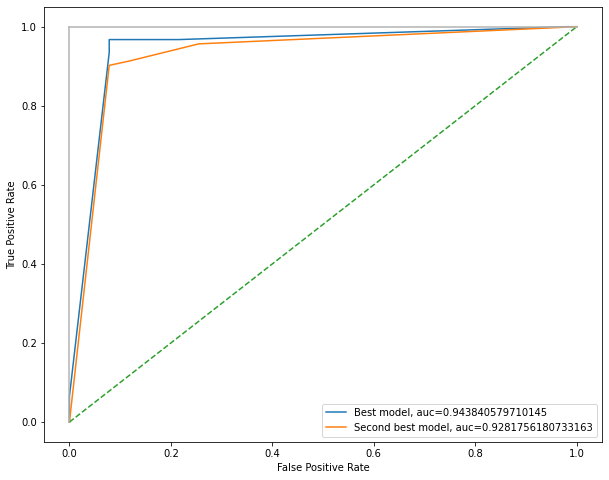

In [151]:
print(f'Best Depth = {best_depth}\nTrain Accuracy = {best_train_accuracy}')
print(f'Text Accuracy = {best_test_accuracy}\nROC AUC = {best_roc_auc_score}\n\n')

print(f'Best Depth = {secondBest_depth}\nTrain Accuracy = {secondBest_train_accuracy}')
print(f'Text Accuracy = {secondBest_test_accuracy}\nROC AUC = {scondBest_roc_auc_score}\n\n')

plt.figure(figsize=(10,8))
plt.plot(fpr_best, tpr_best,label="Best model, auc="+str(best_roc_auc_score))

plt.plot(fpr_secondBest, tpr_secondBest,label="Second best model, auc="+str(scondBest_roc_auc_score))
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.legend(loc=0)